## Resources
- [Wiki](https://en.wikipedia.org/wiki/Knowledge_graph)
- [CS520](https://web.stanford.edu/class/cs520/), [yt seminars 2021](https://www.youtube.com/watch?v=FRcF6sh8sI0&list=PLDhh0lALedc5paY4N3NRZ3j_ui9foL7Qc), [yt seminars 2020](https://www.youtube.com/playlist?list=PLDhh0lALedc7LC_5wpi5gDnPRnu1GSyRG)
- [A Survey on Knowledge Graphs: Representation, Acquisition and Applications](https://arxiv.org/pdf/2002.00388.pdf) -- Good read

**Note**: The topic is way larger than a few notebooks and can have its own course about it

# Multi relational graphs / Knowledge graphs

So far we've only handled graphs with one node type and one edge type. But real world graphs have different types of edges / nodes. For example if we study drug-drug interactions graph edges can represent different side effects that occur when you take both drugs at the same time.


**Heterogenous graphs**  
Heterogenous graphs are multi relational graphs where nodes also have types ($V = V_1 \cup ... \cup V_k$ disjoint sets) with edges as relations $r \in R$.

We can formalize these graphs as $G = (V, E, R)$ with edges $(h, r, t) \in E$ where $h, t \in V$ are the head and tail, and $r \in R$ is the relation type between them

photo from cs224w 2021  
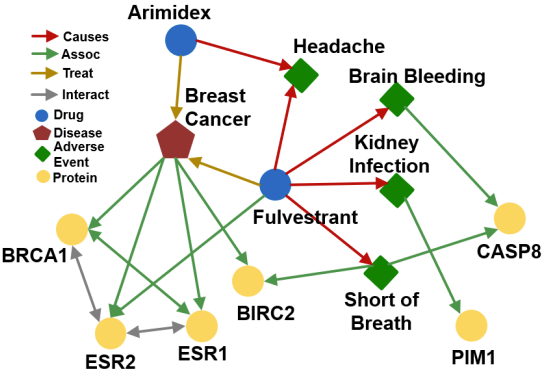

## Tasks on knowledge graphs

In knowledge graphs edges represent  **facts**. Ex: Mona Lisa -> painted by -> da vinci

Photo from [A Survey on Knowledge Graphs: Representation, Acquisition and Applications](https://arxiv.org/pdf/2002.00388.pdf)  
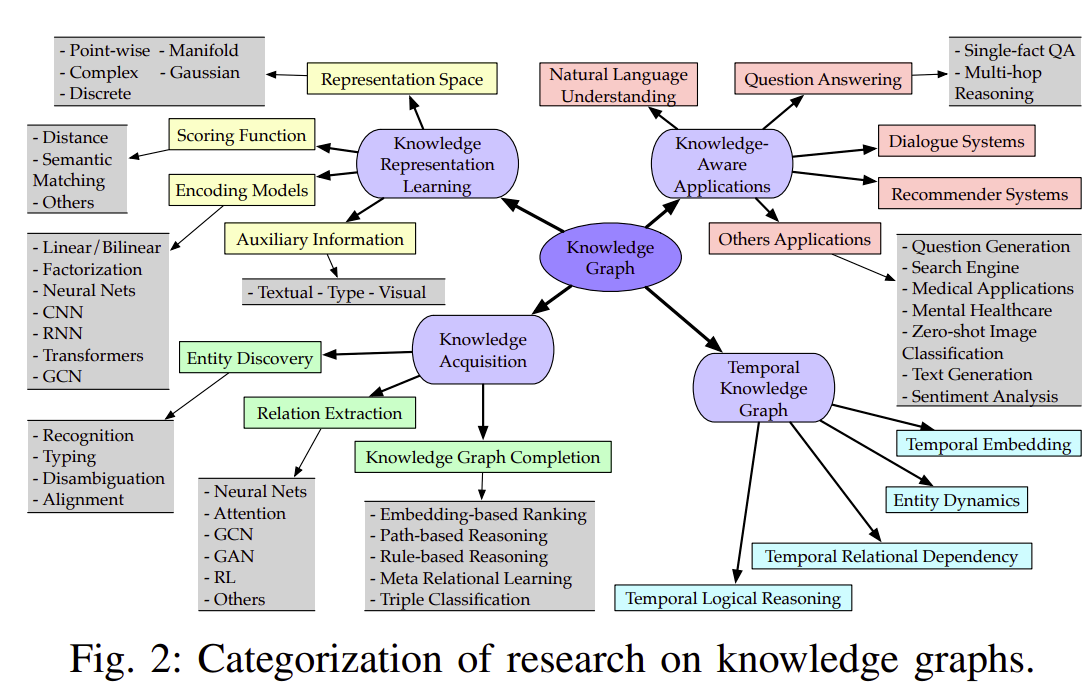

**Knowledge representation learning**  
Learn low-dimensional embeddings of entities and relations. 

**Knowledge acquisition**  
Construct new knowledge graphs from unstructured text, other sources or discover new knowledge in a given knowledge graph. Most knowledge graphs are incomplete.
- Entity discovery
- Link / relation prediction -- Given the embeddings $h_u, h_v$ of two nodes our goal is to reconstruct the relationship between them
- Node discovery / prediction -- Construct new nodes in the graph from unstructured data or the given knowledge graph 
*Techniques*: 
- Embedding based models: Using computed embeddings try to infer new data. These methods rely heavily on existing knowledge needing many of them to be useful.
- Relation path reasoning: Random walks to capture possible paths.
- Rules based reasoning 

**Temporal knowledge graphs**  
Some knowledge graphs aren't static. This area explores ways to add a time component in the knowledge graph. Tasks:
- Temporal embeddings -- Information is encoded as $(h, r, t, \tau)$ where $\tau$ provides temporal information. We want to compute embeddings using this information.
- Entity dynamics -- Real world entities their change state over time. We want to use the temporal context to update the state vectors in time.
- Remporal relational dependency -- Relations modeled in time. Example: `wasBornIn → graduateFrom → workAt → diedIn`

**Knowledge aware applications**  
Building applications using knowledge graphs!

## Types of relations

**Symmetric**
$$r(h, t) \Rightarrow r(t, h)$$
Ex: $(h, \text{"roommate"}, t) \Rightarrow (t, \text{"roommate"}, h)$

**Antisymmetric**
$$r(h, t) \Rightarrow \neg r(t, h)$$


**Inverse relations**
$$r_1(h, t) \Rightarrow \neg r_2(t, h)$$
Ex: $(h, \text{"advisor"}, t) \Rightarrow (t, \text{"advisee"}, h)$

**Composition**
$$r_1(x, y) \wedge r_2(y, z) \Rightarrow r_3(x, z)$$
Ex: $(y, \text{"mother"}, x), (z, \text{"husband"}, y)  \Rightarrow (z, \text{"father"}, y)$

**1-N relations**
$$r(h, t_1), r(h, t_2), ..., r(h, t_n)$$
Ex:"students_of"


## Shallow embeddings

Wiki entry: https://en.wikipedia.org/wiki/Knowledge_graph_embedding

Let edges be $(h, r, t)$ -- head, relation tail.

*Idea*: The embedding of $(h, r)$ should be close to the embedding of $t$.

Questions to ask:
- How to embed $(h, r)$ and $t$?
- How to define **closeness**?
- What type of relations does the defined embedding work on?

- [TransE paper](https://proceedings.neurips.cc/paper/2013/file/1cecc7a77928ca8133fa24680a88d2f9-Paper.pdf)
- [TransR paper](https://www.aaai.org/ocs/index.php/AAAI/AAAI15/paper/viewFile/9571/9523/)
- [RotatE paper](https://arxiv.org/pdf/1902.10197.pdf)
- [DistMult](https://arxiv.org/pdf/1412.6575.pdf)
- [ComplEx](https://arxiv.org/pdf/1606.06357.pdf)

### Trasnlational methods

#### TransE
- [explainer](https://www.youtube.com/watch?v=Ka8d58M4RzQ)

For a triple $(h, r, t)$ we define their embedding vectors ${\bf h, r, t} \in \mathbb{R}^d$.  
We want ${\bf h + r} \approx {\bf t}$ (${\bf t}$ is the nearest neighbor of ${\bf h + r}$ ) if the given fact is true and ${\bf h + r} \neq {\bf t}$ if it's false. Therefore we want to minimize the scoring function $f_r(h, t) = -{\|{\bf h+r-t}\|}$ where $\|\cdot\|$ is some $L_p$ norm

Photo from cs224w 2021  
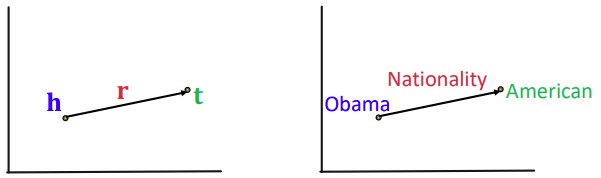

#### TransR

*Idea*: Embeddings should live in another space. Let ${\bf h, t} \in \mathbb R^k$ and $r \in \mathbb R^d$. For each relation $r$, we set a projection matrix $\bf{M}_r \in \mathbb R^{k\times d}$ which projects entities from entity space to relation space. We define the projected vectors of entities as

$${\bf h}_r = {\bf hM}_r \quad {\bf t}_r = {\bf tM}_r$$
and we want to minimize the scoring function $f_r(h, t) = -\|{\bf h}_r+ {\bf r}- {\bf t}_r\|$

Photo from TransR paper  

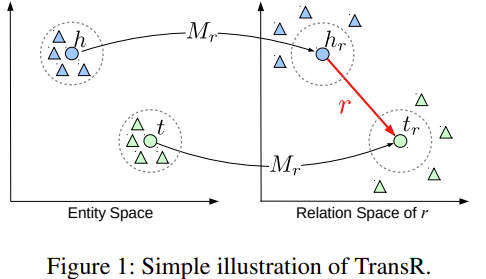

## Deep learning

### RGCN - Relational GCN

paper: [Modeling Relational Data with Graph Convolutional Networks](https://arxiv.org/pdf/1703.06103.pdf)

**RGCN**  
The relational GCNs are an extension of GCNs that add a weight matrix (or a learnable function) per relation type.
$$h_{u} = \sigma \left(W_0h_u + \sum_{r \in R} \sum_{v \in N_r(u)} \dfrac 1 {f(N(u), N(v))}W_rh_v \right)$$
Where $f$ is a normalization function

**Remark**: Notice that the neighbourhood is dependent on the relation type $r$: $N_r(u)$

photos from cs224w 2021  
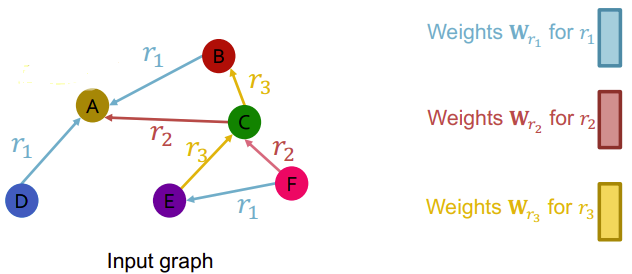

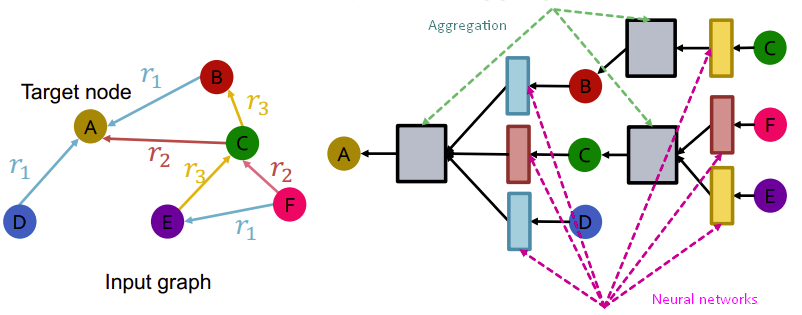

**Scalability problem**  
We have a weight matrix / relation type => If we have a lot of relations the number of parameters of our model explodes. This results in slow training and overfitting (more parameters than information)

**Solution: Basis / dictionary learning**  
We want to share weights between relations. We don't want relationships to be necesarily independent. Therefore we want to represent our weight matrix as a combination of **shared weights** across all relations
$$W_r = \sum_i^b \alpha_{i, r}B_i$$
Where $B_1, ..., B_b$ are a fixed number of the basis matrices and $\alpha_{1, r}, ..., \alpha_{b, r}$ are the importance weights (Tell us how important is each matrix $B_i$ to our relation $r$). Now we only need to learn the $\alpha_{i, r}$ ($b$ parameters) and our basis

# Code

In [1]:
import copy
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os, sys

import torch
import torch_geometric
import torch.nn.functional as F
import torch_geometric.transforms as pyg_T
from torch_geometric.utils import to_networkx, from_networkx

from tqdm import tqdm

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## `HeteroData` object

[PyG Tutorial](https://pytorch-geometric.readthedocs.io/en/latest/notes/heterogeneous.html)

PyG has a `HeteroData` object for which we define node feature tensors, edge index tensors and edge feature tensors **individually** for each type.  
Nodes or edge tensors will be indexed with string keys. Node types are identified by a single string, edge types are identified using a triplet `(source_node_type, edge_type, destination_node_type)`.

Dictionaries containing the heterogeneous information grouped by attribute names rather than by node or edge type can directly be accessed via `data.{attribute_name}_dict`

In [16]:
torch_geometric.__version__

'2.0.1'

In [20]:
from torch_geometric.data import HeteroData
from torch_geometric.datasets import IMDB, OGB_MAG

dataset = IMDB(root=os.path.join("..", "data", "tmp", "IMDB"), transform=pyg_T.ToUndirected())
data = dataset.data
num_classes = torch.max(data["movie"].y).item() + 1  # IMDB doesn't have num_classes for some reason

# dataset = OGB_MAG(root =  os.path.join('..', 'data', 'tmp', "OGB_MAG"), preprocess='metapath2vec', transform=pyg_T.ToUndirected())

In [21]:
# About the dataset

# ?IMDB

In [22]:
print(data)

HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278]
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)


In [23]:
# Get edge and node types

print(data.node_types)
print(data.edge_types)

['movie', 'director', 'actor']
[('movie', 'to', 'director'), ('movie', 'to', 'actor'), ('director', 'to', 'movie'), ('actor', 'to', 'movie')]


In [24]:
print(data.node_types)
print(data.edge_types)

['movie', 'director', 'actor']
[('movie', 'to', 'director'), ('movie', 'to', 'actor'), ('director', 'to', 'movie'), ('actor', 'to', 'movie')]


In [104]:
# Access data about node types

data["movie"]

{'x': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'y': tensor([0, 0, 0,  ..., 1, 2, 1]), 'train_mask': tensor([False, False, False,  ..., False, False, False]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([True, True, True,  ..., True, True, True])}

In [105]:
# Access data about edge types

data["movie", "to", "director"]

{'edge_index': tensor([[   0,    1,    2,  ..., 4275, 4276, 4277],
        [ 789,  680, 1757,  ..., 1781,  166,  399]])}

In [106]:
# Access node feature dictionraies

data.x_dict

{'movie': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 'director': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 'actor': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]])}

## Neighbourhood sampling

**Relational wise neighbourhood**  
To do neighbourhood sampling we need to sample based on relations. For this PyG provides the `torch_geometric.loader.NeighborLoader` or `torch_geometric.loader.HGTLoader`

In [107]:
from torch_geometric.loader import NeighborLoader, NeighborSampler, HGTLoader

Important parameters

`num_neighbors` = The number of neighbors to sample for each node in each iteration. In heterogeneous graphs, may also take in a dictionary denoting the amount of neighbors to sample for each individual edge type.
`input_nodes` = type and indices of nodes from which we want to sample local neighborhoods. 

In [108]:
# All movies marked as training nodes

# https://github.com/pyg-team/pytorch_geometric/issues/3167
num_neighbors = {"__".join(k): [2] for k in data.edge_types}  # sample at most 2 neighbours / edge type
# print(f"{num_neighbors = }")


train_loader = NeighborLoader(
    data, num_neighbors=num_neighbors, batch_size=2, input_nodes=("movie", data["movie"].train_mask)
)

In [109]:
next(iter(train_loader))

HeteroData(
  movie={
    x=[2, 3066],
    y=[2],
    train_mask=[2],
    val_mask=[2],
    test_mask=[2],
    batch_size=2
  },
  director={ x=[2, 3066] },
  actor={ x=[4, 3066] },
  (movie, to, director)={ edge_index=[2, 0] },
  (movie, to, actor)={ edge_index=[2, 0] },
  (director, to, movie)={ edge_index=[2, 2] },
  (actor, to, movie)={ edge_index=[2, 4] }
)

## Creating heterogenous GNNs

Standard Message Passing GNNs can not trivially be applied to heterogenous graph data, as node and edge features from different types can not be processed by the same functions due to differences in feature type. PyG provides 3 approaches to create Heterogenous GNNs

1. Automatically convert a homogenous GNN to a geterogenous GNN with
```python
torch_geometric.nn.to_herero(model, (node_types, edge_types))
torch_geometric.nn.to_herero_with_bases(model, (node_types, edge_types))
```
2. Define individual functions per relation using PyGs wrapper `torch_geometric.nn.conv.HeteroConv` for heterogeneous convolutions (for example SageConv on a relation, GAT on another)
3. Write your own  heterogenous GNN operators

Converting GNNs

1. Duplicates message passing modules for each edge type
2. Transforms the underlying computation graph so that messages are exchanged along different edge types
3. Use lazy initialization (`in_channels = -1`) to handle different input feature dimensionalities

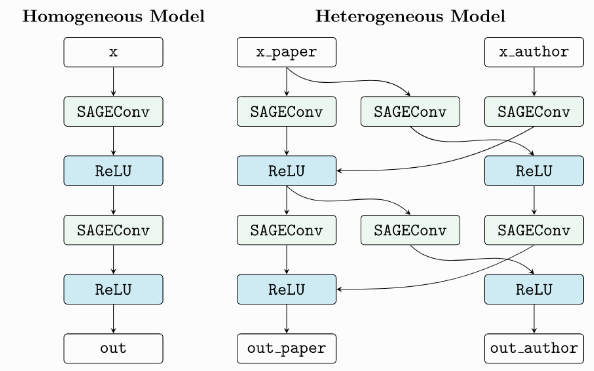

In [17]:
data.node_types, data.edge_types

(['movie', 'director', 'actor'],
 [('movie', 'to', 'director'),
  ('movie', 'to', 'actor'),
  ('director', 'to', 'movie'),
  ('actor', 'to', 'movie')])

In [18]:
from torch_geometric.loader import NeighborLoader, NeighborSampler, HGTLoader

# num_neighbors = {'__'.join(k): [15, 10] for k in data.edge_types} # sample at most 2 neighbours / edge type
train_loader = NeighborLoader(
    data, num_neighbors=[5, 5], batch_size=32, input_nodes=("movie", data["movie"].train_mask), shuffle=True
)
val_loader = NeighborLoader(
    data, num_neighbors=[5, 5], batch_size=32, input_nodes=("movie", data["movie"].val_mask), shuffle=True
)
test_loader = NeighborLoader(
    data, num_neighbors=[5, 5], batch_size=32, input_nodes=("movie", data["movie"].test_mask), shuffle=True
)

In [19]:
from torch_geometric.nn import GATConv, SAGEConv, to_hetero, to_hetero_with_bases, Linear
from torch_geometric.loader import NeighborLoader, NeighborSampler, HGTLoader


class GNN(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels, dropout=0.2, negative_slope=0.2):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), out_channels)

        self.dropout = dropout
        self.negative_slope = negative_slope

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.leaky_relu(x, negative_slope=self.negative_slope)
        if self.training:
            x = F.dropout(x, p=self.dropout)
        x = self.conv2(x, edge_index)

        return x


model = GNN(hidden_channels=32, out_channels=num_classes, dropout=0.4)
# We need to pass the node types and edge types
# and the aggregation scheme to use for grouping node embeddings generated by different relations
model = to_hetero(model, (data.node_types, data.edge_types), aggr="sum")
# model = to_hetero_with_bases(model, (data.node_types, data.edge_types), num_bases=2)
model.to(device)

# Do a passing to initialize the dimensions
with torch.no_grad():
    init_batch = next(iter(train_loader))
    init_batch.to(device)
    model(init_batch.x_dict, init_batch.edge_index_dict)

In [20]:
model

GraphModule(
  (conv1): ModuleDict(
    (movie__to__director): SAGEConv((-1, -1), 32)
    (movie__to__actor): SAGEConv((-1, -1), 32)
    (director__to__movie): SAGEConv((-1, -1), 32)
    (actor__to__movie): SAGEConv((-1, -1), 32)
  )
  (conv2): ModuleDict(
    (movie__to__director): SAGEConv((-1, -1), 3)
    (movie__to__actor): SAGEConv((-1, -1), 3)
    (director__to__movie): SAGEConv((-1, -1), 3)
    (actor__to__movie): SAGEConv((-1, -1), 3)
  )
)

In [154]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = F.cross_entropy

In [155]:
def train(model, train_loader, optimizer, loss_fn):
    model.train()

    total_samples = 0
    total_loss = 0
    total_correct = 0
    for batch in train_loader:
        batch = batch.to(device)
        batch_size = batch["movie"].batch_size

        optimizer.zero_grad()
        out = model(batch.x_dict, batch.edge_index_dict)
        loss = loss_fn(out["movie"][:batch_size], batch["movie"].y[:batch_size])
        loss.backward()
        optimizer.step()

        pred = out["movie"][:batch_size].argmax(dim=-1)

        total_samples += batch_size
        total_loss += float(loss.item()) * batch_size
        total_correct += int(torch.sum(pred == batch["movie"].y[:batch_size]))

    return total_loss / total_samples, total_correct / total_samples


@torch.no_grad()
def test(model, train_loader, loss_fn):
    model.eval()

    total_samples = 0
    total_loss = 0
    total_correct = 0
    for batch in train_loader:
        batch = batch.to(device)
        batch_size = batch["movie"].batch_size

        out = model(batch.x_dict, batch.edge_index_dict)
        loss = loss_fn(out["movie"][:batch_size], batch["movie"].y[:batch_size])

        pred = out["movie"][:batch_size].argmax(dim=-1)

        total_samples += batch_size
        total_loss += float(loss.item()) * batch_size
        total_correct += int(torch.sum(pred == batch["movie"].y[:batch_size]))

    return total_loss / total_samples, total_correct / total_samples

In [156]:
epochs = 10
for epoch in range(epochs):
    loss_train, acc_train = train(model, train_loader, optimizer, loss_function)
    loss_val, acc_val = test(model, val_loader, loss_function)
    if epoch % 1 == 0:
        print(f"{epoch = } | {loss_train=: .2f} {acc_train=: .2f} \t {loss_val=: .2f} {acc_val=: .2f}")

epoch = 0 | loss_train= 1.08 acc_train= 0.46 	 loss_val= 1.05 acc_val= 0.45
epoch = 1 | loss_train= 0.92 acc_train= 0.78 	 loss_val= 1.00 acc_val= 0.54
epoch = 2 | loss_train= 0.71 acc_train= 0.91 	 loss_val= 0.96 acc_val= 0.55
epoch = 3 | loss_train= 0.50 acc_train= 0.97 	 loss_val= 0.90 acc_val= 0.58
epoch = 4 | loss_train= 0.33 acc_train= 0.98 	 loss_val= 0.90 acc_val= 0.57
epoch = 5 | loss_train= 0.21 acc_train= 0.99 	 loss_val= 0.91 acc_val= 0.59
epoch = 6 | loss_train= 0.14 acc_train= 1.00 	 loss_val= 0.90 acc_val= 0.59
epoch = 7 | loss_train= 0.10 acc_train= 1.00 	 loss_val= 0.95 acc_val= 0.58
epoch = 8 | loss_train= 0.08 acc_train= 1.00 	 loss_val= 0.99 acc_val= 0.58
epoch = 9 | loss_train= 0.06 acc_train= 1.00 	 loss_val= 0.95 acc_val= 0.61


In [158]:
test(model, test_loader, loss_function)

(1.0487718696975379, 0.5632547441058079)